In [42]:
import os
import sys
from glob import glob
import json
import dgl
import networkx as nx

In [43]:
!ls ../../../../../../srv/scratch/bic/peter/Report-nmi-wsi

ls: cannot access '../../../../../../srv/scratch/bic/peter/Report-nmi-wsi': No such file or directory


In [3]:
base = "../../../../../../srv/scratch/bic/peter/Report"
path = "eval_annotation.json"
file_path = os.path.join(base,path)
print(file_path)

../../../../../../srv/scratch/bic/peter/Report/eval_annotation.json


In [36]:
# Read the JSON file
with open(file_path, 'r') as json_file:
    data = json.load(json_file)

# Extract the keys and print them
keys = list(data.keys())
# print("Keys:", keys)

# Print the first key-value pair
if keys:
    first_key = keys[0]
    first_value = data[first_key]['caption']
    print("First Key:", first_key)
    print("First Value:", first_value)
else:
    print("The JSON file is empty.")

First Key: 118242_010
First Value: ['Nuclear features show moderate pleomorphism. Mild crowding of the nuclei can be seen. Architecturally the cells show complete lack of polarity toward the surface urothelium. Mitosis is frequent. The nucleoli of nuclei are prominent. High grade.', 'Moderate pleomorphism and cytologic atypia is present. Mild nuclear crowding is seen. Polarity is completely lost. Mitosis is frequent throughout the tissue. Prominent nucleoli are easily identified in low magnification scanning. High grade.', 'Nuclear features show moderate pleomorphism. Mild nuclear crowding is seen. Polarity is completely lost. Mitosis is frequent throughout the tissue. Nucleoli is prominent. High grade.', 'Moderate pleomorphism and cytologic atypia is present. There is a mild degree of crowding. Architecturally the cells show complete lack of polarity toward the surface urothelium. There are frequent mitotic figures throughout the tissue. Prominent nucleoli are easily identified in low

In [37]:
print(data["118290_011"])

{'caption': ['Nuclear features show moderate pleomorphism. Moderate crowding of the nuclei can be seen. Polarity is completely lost. Mitotic figures including the atypical forms are frequently seen in all levels of the urothelium. The nucleoli are mostly inconspicuous. High grade.', 'Minimal variability in nuclear size shape and outline consistent with moderate pleomorphism. Moderate crowding of the nuclei can be seen. Polarity is completely lost. Mitosis is frequent. Nucleoli is absent to inconspicuous. High grade.', 'Moderate pleomorphism and cytologic atypia is present. Moderate nuclear crowding is seen. There is marked disorganization and lack of cellular polarity toward the surface urothelium. There are frequent mitotic figures throughout the tissue. The nucleoli are mostly inconspicuous. High grade.', 'Moderate pleomorphism is present. The nuclei are crowded to a moderate degree. Polarity is completely lost. There are frequent mitotic figures throughout the tissue. The nucleoli a

In [38]:
filename = "fadfa.bin"
base_name, _ = os.path.splitext(filename)
new_filename = base_name + ".jpg"
print(new_filename)

fadfa.jpg


In [39]:
!ls ../../../../../../srv/scratch/bic/peter/full-graph

assignment_mat	cell_graphs  tissue_graphs


In [7]:
cg_path = "../../../../../../srv/scratch/bic/peter/full-graph-raw/cell_graphs/train"
cg_graph_sing = "../../../../../../srv/scratch/bic/peter/full-graph-raw/cell_graphs/train"
cg = glob(os.path.join(cg_path, '*.bin'))
cg_sing = glob(os.path.join(cg_path,'*.bin'))
cg.sort()
cg_sing.sort()
# num_cg = len(cg)
# print(len(cg))
# print(len(cg_sing))
# print(set(cg)==set(cg_sing))
print(cg[0])
print(cg_sing[0])

../../../../../../srv/scratch/bic/peter/full-graph-raw/cell_graphs/train/115833_000.bin
../../../../../../srv/scratch/bic/peter/full-graph-raw/cell_graphs/train/115833_000.bin


In [17]:
graph_one = dgl.load_graphs(cg[2])[0][0]
print(graph_one.ndata['feat'].shape)
print(graph_one.ndata['position'].shape)

torch.Size([531, 514])
torch.Size([531, 4])


In [8]:
graph = dgl.load_graphs(cg[25])[0][0]
print(graph.edges())

nx_G = graph.to_networkx().to_undirected()
# pos = nx.kamada_kawai_layout(nx_G)
nx.draw(nx_G, pos, with_labels=True, node_color=[[.7, .7, .7]])

(tensor([  0,   0,   0,  ..., 362, 362, 362]), tensor([  1,  17,  20,  ..., 337, 347, 355]))


NameError: name 'pos' is not defined

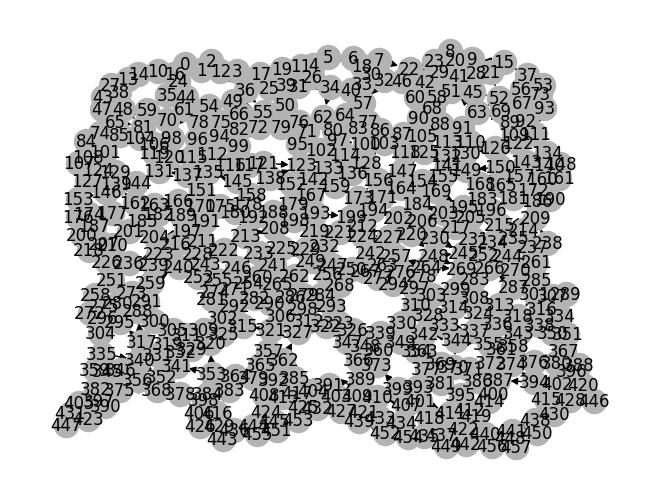

In [9]:
graph_sing = dgl.load_graphs(cg_sing[0])[0][0]
# print(graph_sing)
nx_G = graph_sing.to_networkx()
pos = nx.kamada_kawai_layout(nx_G)
nx.draw(nx_G, pos, with_labels=True, node_color=[[.7, .7, .7]])

In [43]:
! ls ../../../../../../srv/scratch/bic/peter/Report/Images/

eval  test  train


In [44]:
import matplotlib.pyplot as plt
def show_inline(image, title=''):
    f, ax = plt.subplots(1, 1, figsize=(10,10))
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(image)
    ax.set_title(title)
    plt.show()

(512, 512, 3)
../../../../../../srv/scratch/bic/peter/Report/Images/train/115842_005.png
model_path is /home/z5313504/Desktop/venv/GNN-Histo-Caption/main/../histocartography/histocartography/preprocessing/../../checkpoints/pannuke.pt


Patch-level nuclei detection: 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]


Nuclear map shape (512, 512)
Centroid shape (314, 2)
build graph torch.Size([314, 514])


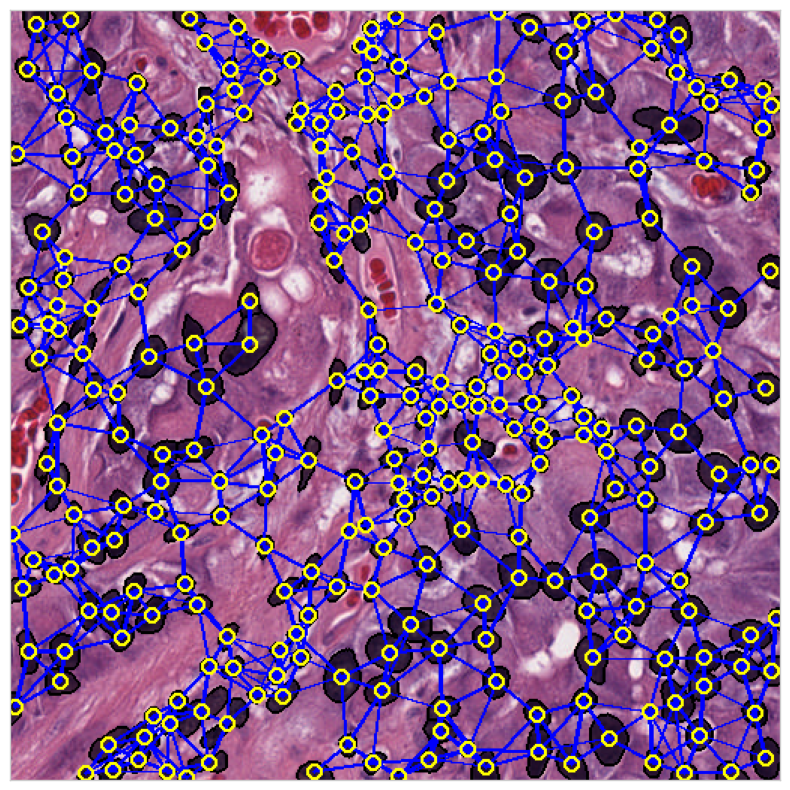

Graph(num_nodes=314, num_edges=1518,
      ndata_schemes={'centroid': Scheme(shape=(2,), dtype=torch.float32), 'feat': Scheme(shape=(514,), dtype=torch.float32), 'position': Scheme(shape=(4,), dtype=torch.float32)}
      edata_schemes={})


' \nk = 3, thresh 50 num_nodes=314, num_edges=1518\nk = 5, thresh 80 num_nodes=314, num_edges=1570\nk = 5, thresh 50, num_nodes=314, num_edges=1518\nk = 5, thresh 40, num_nodes=314, num_edges=1321\nk = 5 thresh 30 num_nodes=314, num_edges=890\n'

In [45]:
sys.path.append('../histocartography/histocartography')
sys.path.append('../histocartography')
from histocartography.preprocessing import NucleiExtractor, DeepFeatureExtractor, KNNGraphBuilder
import warnings
import torch
# graph = dgl.load_graphs(cg[25])[0][0]
# To filter out all warnings
warnings.filterwarnings("ignore")
import numpy as np
from PIL import Image
i = 20
img_path = f"../../../../../../srv/scratch/bic/peter/Report/Images/train/{os.path.split(cg[i])[-1].split('.')[0]}.png"
img = np.array(Image.open(img_path))
print(img.shape)
print(img_path)
#graph = dgl.load_graphs(cg[i])[0][0]
from histocartography.visualization import OverlayGraphVisualization, InstanceImageVisualization
nuclei_detector = NucleiExtractor()
# Define a deep feature extractor with ResNet34 and patches 72 resized to 224 to match ResNet input
feature_extractor = DeepFeatureExtractor(architecture='resnet34', patch_size=72, resize_size=224)

# Define a graph builder to build a DGLGraph object 
graph_builder = KNNGraphBuilder(k=5, thresh=50, add_loc_feats=True)
nuclei_map, centroid = nuclei_detector.process(img)

print(f"Nuclear map shape {nuclei_map.shape}")
print(f"Centroid shape {centroid.shape}")
# print(type(centroid))


#print(f"exp: {centroid[0:2,:]}")
features = feature_extractor.process(img, nuclei_map)

graph = graph_builder.process(nuclei_map, features)
print(f"build graph {graph.ndata['feat'].shape}")
# graph.ndata['centroid'] = torch.from_numpy(centroid)
#print(f"build centroid  {graph.ndata['centroid']}")

visualizer = OverlayGraphVisualization(
    instance_visualizer=InstanceImageVisualization(
        instance_style="filled+outline"
    )
)
viz_cg = visualizer.process(
    canvas=img,
    graph=graph,
    instance_map=nuclei_map
)
show_inline(viz_cg)
viz_cg.show()
print(graph)
''' 
k = 3, thresh 50 num_nodes=314, num_edges=1518
k = 5, thresh 80 num_nodes=314, num_edges=1570
k = 5, thresh 50, num_nodes=314, num_edges=1518
k = 5, thresh 40, num_nodes=314, num_edges=1321
k = 5 thresh 30 num_nodes=314, num_edges=890
'''

In [49]:
print(graph.ndata.keys())

dict_keys(['centroid', 'feat', 'position'])


In [47]:
print(graph.ndata["position"].shape)

torch.Size([314, 4])


In [18]:
CENTROID = "centroid"
list_node = graph.nodes()
average_distances = torch.zeros((graph.num_nodes(), 2))
for node in list_node:
    neighbors = graph.successors(node)
    # print(f"node is {node} len nei is {len(neighbors)}")
    node_centroid = graph.ndata[CENTROID][node]
    neighbor_centroids = graph.ndata[CENTROID][neighbors]
    distances = neighbor_centroids - node_centroid
    #print(f"distances {distances}")
    #Calculate the average distances
    average_distances[node, 0] = distances[:, 0].abs().mean()  # Average x distance
    average_distances[node, 1] = distances[:, 1].abs().mean()  # Average y distance
    
#     x = distances[:, 0].abs().mean()  # Average x distance
#     y = distances[:, 1].abs().mean()  # Average y distance
#     print(f"node {node} x dis:{x} y dis: {y} cen is {node_centroid}")
print(average_distances.shape)

min_distance = average_distances.min(dim=0)[0]  # Minimum distance for x and y
max_distance = average_distances.max(dim=0)[0]  # Maximum distance for x and y
#print(max_distance)
normalized_distances = (average_distances - min_distance) / (max_distance - min_distance)

# # Handle edge cases where max_distance == min_distance
# normalized_distances[max_distance == min_distance] = 0

print(normalized_distances[:,0].shape)

)07=                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

/bin/xdg-open: line 862: www-browser: command not found
/bin/xdg-open: line 862: links2: command not found
/bin/xdg-open: line 862: elinks: command not found
/bin/xdg-open: line 862: links: command not found


In [19]:
print(type(os.path.split(cg[0])[-1].split(".")[0]))

<class 'str'>


In [20]:
cg_name = [os.path.splitext(os.path.split(i)[-1])[0] for i in cg]
cg_sing_name = [os.path.splitext(os.path.split(i)[-1])[0] for i in cg_sing]

In [10]:
# for i in cg:
#     spt = os.path.split(i)[-1]
#     base_name, _ = os.path.splitext(spt)
#     new_filename = base_name + ".jpg"
#     print(new_filename)

In [53]:
!ls ../../Report-nmi-wsi

Images                nmi-wsi.zip           train_annotation.json
Images.zip            test
class.json            test_annotation.json


In [51]:
all_image = glob("../../Report-nmi-wsi/Images/*.png")
print(len(all_image))

4253


In [54]:
test_report = "../../Report-nmi-wsi/test_annotation.json"
train_report = "../../Report-nmi-wsi/train_annotation.json"

with open(test_report, 'r') as test_file:
    t_data = json.load(test_file)
    print(len(t_data.keys()))

with open(train_report, 'r') as train_file:
    tr_data = json.load(train_file)
    print(len(tr_data.keys()))



1889
2364


In [56]:
a = '1_00061_sub0_002'
if a in t_data.keys():
    print(a)
if a in tr_data.keys():
    print("fdsfas")

fdsfas


In [69]:
# report_path = "../../Report-nmi-wsi"
# split = "train"
# split_annotation = split+"_annotation.json"
# report_path = os.path.join(report_path,split_annotation)
# print(report_path)
# print(file_path)
# with open(report_path, 'r') as json_file:
#     report_data = json.load(json_file)
#     print(report_data)
# print(new_file_names)
# values_in_order = [report_data[key]['caption'] for key in new_file_names if key in report_data.keys()]
# print(len(values_in_order[0]))

In [248]:
from dgl.data.utils import load_graphs
from glob import glob
graph_path = "./graph"
split = "test" # Train Test Eval
cg_path = os.path.join(graph_path,"cell_graphs",split)
print(cg_path)

cgs = glob(os.path.join(cg_path,'*bin'))
print(len(cgs))
# print()
# cell_graphs = [load_graphs(cg) for cg in cgs]
# for i in cell_graphs:
#     print(i[0][0[]])


./graph/cell_graphs/test
13


In [14]:
print(first[0])
print(first[0][0])

[Graph(num_nodes=290, num_edges=1419,
      ndata_schemes={'feat': Scheme(shape=(514,), dtype=torch.float32), 'centroid': Scheme(shape=(2,), dtype=torch.float32)}
      edata_schemes={})]
Graph(num_nodes=290, num_edges=1419,
      ndata_schemes={'feat': Scheme(shape=(514,), dtype=torch.float32), 'centroid': Scheme(shape=(2,), dtype=torch.float32)}
      edata_schemes={})


In [37]:
import dgl
import dgl.nn.pytorch as dglnn
import torch
import torch.nn as nn
import torch.nn.functional as F

In [38]:
class GCN(nn.Module):
    def __init__(self, in_feats, hidden_feats, out_feats):
        super(GCN, self).__init__()
        self.conv1 = dglnn.GraphConv(in_feats, hidden_feats)
        self.conv2 = dglnn.GraphConv(hidden_feats, out_feats)

    def forward(self, g, features):
        # Apply the first GraphConv layer
        x = F.relu(self.conv1(g, features))
        # Apply the second GraphConv layer
        x = self.conv2(g, x)
        return x

In [265]:
import os
from dataloader import make_dataloader
from Vocabulary import Vocabulary
loader = make_dataloader(
    batch_size = 2,
    split = "test",
    base_data_path = "../../Report-nmi-wsi",
    graph_path = "graph",
    vocab_path = "../../Report-nmi-wsi/vocab_bladderreport.pkl",
    shuffle=True,
    num_workers=0,
    load_in_ram = True
)



In [267]:
import networkx as nx
# a dataset with 80 samples, each graph is
#  of size [10, 20]

for batch_idx, batch_data in enumerate(loader):
    # Your batch processing code here
    cg, tg, assign_mat, caption_tokens, label, caption = batch_data
    tg_list = dgl.unbatch(tg)
    graph_list = tg_list[0:4]
    for i in graph_list:
        zero = (i.in_degrees() == 0).any()
        if zero:
            nx.draw(i.to_networkx())
            break
            # print(f"    In loop, Have 0 degree {zero}")
            # print(i)
            # srcs, dsts = i.all_edges()
            # i.add_edges(dsts, srcs)
            # i.remove_self_loop().add_self_loop()
            # zero = (i.in_degrees() == 0).any()
            # print(f"    After is {zero}")
            # print(i)
            break
        batched_graph = dgl.batch(graph_list)
    break

In [263]:
import numpy as np
for batch_idx, batch_data in enumerate(loader):
    # Your batch processing code here
    cg, tg, assign_mat, caption_tokens, label, caption = batch_data
    cg_list = dgl.unbatch(cg)
    print(cg_list[0])
    print(assign_mat[0].shape)
    g = cg_list[0]
    print(g)

    # first_contains_zero = (batched_graph.in_degrees() == 0).any()
    # out_contains_zero = (batched_graph.out_degrees() == 0).any()
    # print(first_contains_zero)
    # print(out_contains_zero)
    # print(batched_graph.in_degrees())
    # print(batched_graph.out_degrees())
    # batched_graph = cg_list[1]
    # print(cg_list[0].in_degrees())
    # print(cg_list[0].out_degrees())
    # srcs, dsts = cg_list[0].all_edges()
    # cg_list[0].add_edges(dsts, srcs)
    # print(cg_list[0].in_degrees())
    # print(cg_list[0].out_degrees())
    # first_contains_zero = (cg_list[0].in_degrees() == 0).any()
    # print(f"First {first_contains_zero}")
    # # print(cg_list[1].in_degrees())
    # second_contains_zero = (cg_list[1].in_degrees() == 0).any()
    # print(f"Second {second_contains_zero}")
    # batch_contain_zero = (batched_graph.in_degrees() == 0).any()
    # print(f"Second {batch_contain_zero}")
    # Example input features (random data)
#     num_nodes = batched_graph.number_of_nodes()
#     in_feats = 3  # Input feature dimension
#     features = torch.randn(num_nodes, in_feats
    break

Graph(num_nodes=395, num_edges=2362,
      ndata_schemes={'feat': Scheme(shape=(514,), dtype=torch.float32), 'centroid': Scheme(shape=(2,), dtype=torch.float32)}
      edata_schemes={})
torch.Size([395, 8])
Graph(num_nodes=395, num_edges=2362,
      ndata_schemes={'feat': Scheme(shape=(514,), dtype=torch.float32), 'centroid': Scheme(shape=(2,), dtype=torch.float32)}
      edata_schemes={})


In [6]:
# Create a list of individual graphs (DGLGraph objects)
graph_list = [dgl.graph((0, 1)), dgl.graph((1, 2))]

# Batch the graphs into a single batched graph
batched_graph = dgl.batch(graph_list)

# Example input features (random data)
num_nodes = batched_graph.number_of_nodes()
in_feats = 3  # Input feature dimension
features = torch.randn(num_nodes, in_feats)

# Create the GCN model
hidden_feats = 4
out_feats = 2
gcn_model = GCN(in_feats, hidden_feats, out_feats)
print(features.shape)
# Forward pass
output = gcn_model(batched_graph, features)
print(output.shape)

TypeError: object of type 'int' has no len()

3
Graph(num_nodes=9, num_edges=29,
      ndata_schemes={'feat': Scheme(shape=(514,), dtype=torch.float32), 'centroid': Scheme(shape=(2,), dtype=torch.float32)}
      edata_schemes={})


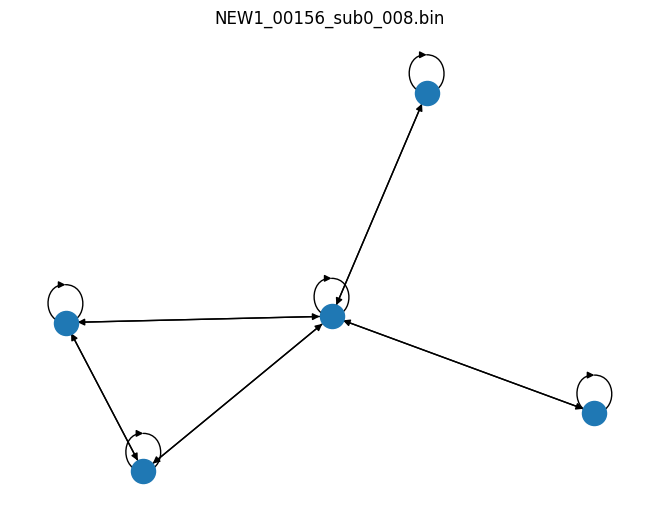

Graph(num_nodes=5, num_edges=15,
      ndata_schemes={'feat': Scheme(shape=(514,), dtype=torch.float32), 'centroid': Scheme(shape=(2,), dtype=torch.float32)}
      edata_schemes={})


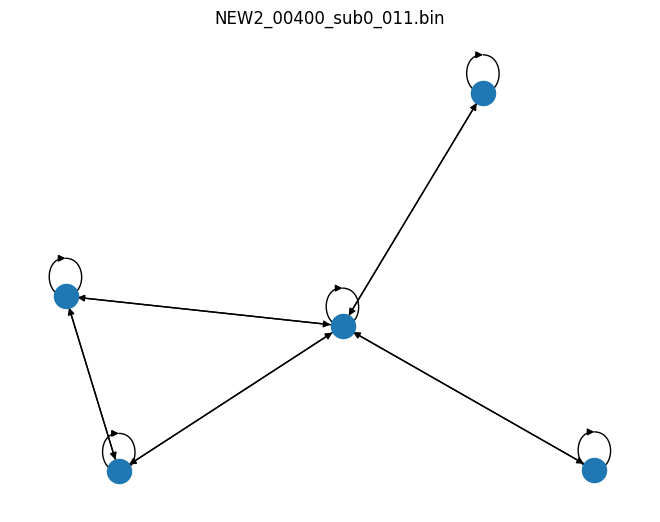

Graph(num_nodes=8, num_edges=28,
      ndata_schemes={'feat': Scheme(shape=(514,), dtype=torch.float32), 'centroid': Scheme(shape=(2,), dtype=torch.float32)}
      edata_schemes={})


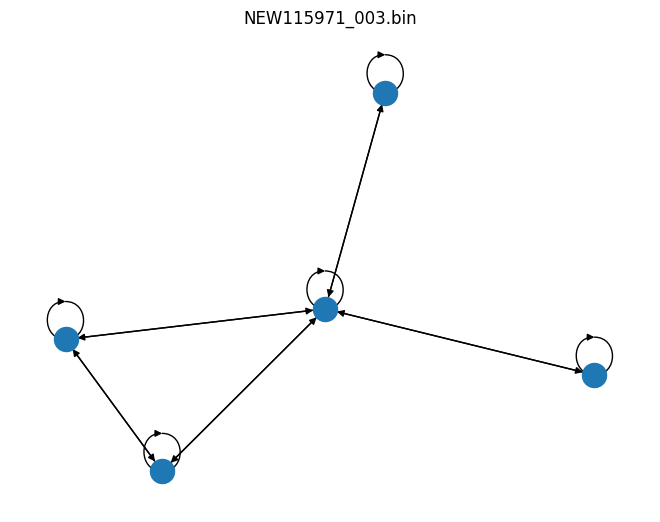

In [268]:
import matplotlib.pyplot as plt
directory = "graph/tissue_graphs/test"
graph_files = [f for f in os.listdir(directory) if f.endswith('.bin')][0:3]
# graph_files = ["1_00143_sub0_049.bin"]
print(len(graph_files))
graph_list = []
for graph_file in graph_files:
    graph_path = os.path.join(directory, graph_file)
    
    # Use DGL's function to read the binary graph
    graph = dgl.load_graphs(graph_path)[0][0]  # Assuming there's only one graph per file
    print(graph.ndata["feat"])
    graph_list.append(graph)
    print(graph)
    # nx.draw(i.to_networkx())
    # plt.title("NEW"+graph_file)  # Specify your desired title here
    # # Show the plot
    # plt.show()

    # # in_degrees = graph.in_degrees().numpy()
    # # out_degrees = graph.out_degrees().numpy()
    # # isolated_nodes = (in_degrees == 0) & (out_degrees == 0)

    # # # Remove isolated nodes
    # # graph.remove_nodes(isolated_nodes)
    # nx.draw(i.to_networkx())
    # plt.title("NEW"+graph_file)  # Specify your desired title here
    # # Show the plot
    # plt.show()
    # break
# print('------------BATCHING-------------')
# batch = dgl.batch(graph_list)
# print(batch)
# print('------------BATCHING-------------')
# unbatch = dgl.unbatch(batch)
# for i in unbatch:
#     print(i)



    

# Model Inference

In [ ]:
# Load Modal
import torch
from graph_generation import build_single
encoder_path = "../../../../../../srv/scratch/bic/peter/encoder/GCN-LSTM_encoder_epoch39.pt"
decoder_path = "../../../../../../srv/scratch/bic/peter/encoder/GCN-LSTM_decoder_epoch39.pt"

encoder = torch.load(encoder_path)
decoder = torch.load(decoder_path)
encoder.eval()
decoder.eval()

img_name = "../../../../../../srv/scratch/bic/peter/Report-nmi-wsi/Images/test/115941_013.png"
build_single(img_name,"graph") # put a single graph in it
img_split = img_name.split()
print(img_split)

# Check Graph

In [21]:
!ls ../../../../../../srv/scratch/bic/peter/full-graph-raw/
import dgl
import h5py
import numpy as np
import torch
import torch.nn as nn
import os
'''
cell_graphs/test
1_00062_sub0_000.bin  115926_008.bin  116925_011.bin  118374_013.bin
assignment_mat/test
1_00062_sub0_000.h5  115926_008.h5  116925_011.h5  118374_013.h5
'''

assignment_mat	cell_graphs  tissue_graphs


'\ncell_graphs/test\n1_00062_sub0_000.bin  115926_008.bin  116925_011.bin  118374_013.bin\nassignment_mat/test\n1_00062_sub0_000.h5  115926_008.h5  116925_011.h5  118374_013.h5\n'

In [5]:
def h5_to_tensor(h5_path):
    h5_object = h5py.File(h5_path, 'r')
    out = torch.from_numpy(np.array(h5_object['assignment_matrix']))
    return out

In [6]:
name = "1_00062_sub0_000"
new_cg_path = f"../../../../../../srv/scratch/bic/peter/full-graph-raw/cell_graphs/test/{name}.bin"
new_tg_path = f"../../../../../../srv/scratch/bic/peter/full-graph-raw/tissue_graphs/test/{name}.bin"
new_ass_path = f"../../../../../../srv/scratch/bic/peter/full-graph-raw/assignment_mat/test/{name}.h5"
cg_path = f"../../../../../../srv/scratch/bic/peter/full-graph/cell_graphs/test/{name}.bin"
tg_path = f"../../../../../../srv/scratch/bic/peter/full-graph/tissue_graphs/test/{name}.bin"
ass_path = f"../../../../../../srv/scratch/bic/peter/full-graph/assignment_mat/test/{name}.h5"

In [8]:
cg = dgl.load_graphs(cg_path)[0][0]  # Assuming there's only one graph per file
print(cg.ndata["feat"].shape)
tg = dgl.load_graphs(tg_path)[0][0]
print(tg.ndata["feat"].shape)
assign_mat = h5_to_tensor(ass_path)
print(assign_mat.shape)
print(assign_mat[0:5,:])

torch.Size([129, 514])
torch.Size([6, 514])
torch.Size([129, 6])
tensor([[1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.]], dtype=torch.float64)


In [9]:
!ls ../../../../../../srv/scratch/bic/peter/full-graph-raw/cell_graphs

eval  test  train


In [10]:
phase = "train"
directory = f"../../../../../../srv/scratch/bic/peter/full-graph/cell_graphs/{phase}"
graph_files = [f[:-4] for f in os.listdir(directory) if f.endswith('.bin')]
raw_directory = f"../../../../../../srv/scratch/bic/peter/full-graph-raw/cell_graphs/{phase}"
graph_files_raw = [f[:-4] for f in os.listdir(raw_directory) if f.endswith('.bin')]
print(f"len raw: {len(graph_files_raw)} not raw: {len(graph_files)} ")
for name in graph_files:
    new_cg_path = f"../../../../../../srv/scratch/bic/peter/full-graph-raw/cell_graphs/{phase}/{name}.bin"
    new_tg_path = f"../../../../../../srv/scratch/bic/peter/full-graph-raw/tissue_graphs/{phase}/{name}.bin"
    new_ass_path = f"../../../../../../srv/scratch/bic/peter/full-graph-raw/assignment_mat/{phase}/{name}.h5"
    cg_path = f"../../../../../../srv/scratch/bic/peter/full-graph/cell_graphs/{phase}/{name}.bin"
    tg_path = f"../../../../../../srv/scratch/bic/peter/full-graph/tissue_graphs/{phase}/{name}.bin"
    ass_path = f"../../../../../../srv/scratch/bic/peter/full-graph/assignment_mat/{phase}/{name}.h5"
    
    cg_shape = dgl.load_graphs(cg_path)[0][0].ndata["feat"].shape
    tg_shape = dgl.load_graphs(tg_path)[0][0].ndata["feat"].shape
    new_cg_shape = dgl.load_graphs(new_cg_path)[0][0].ndata["feat"].shape
    new_tg_shape = dgl.load_graphs(new_tg_path)[0][0].ndata["feat"].shape
    # assign_mat = h5_to_tensor(ass_path)
    assign_mat_shape = h5_to_tensor(ass_path).shape
    new_assign_mat_shape = h5_to_tensor(new_ass_path).shape
    # if cg_shape != new_cg_shape:
    #     print(f"NAME: {name}")
    #     print(f"CG raw: {new_cg_shape} other {cg_shape}")
    #     print(f"TG raw: {new_tg_shape} other {tg_shape}")
    #     print(f"ASS raw: {new_assign_mat_shape} other {assign_mat_shape}")
    #     print("-------------------------------------")

len raw: 2336 not raw: 2336 


In [11]:
# !ls ../../../../../../srv/scratch/bic/peter/Report/Images/eval

In [12]:
phase_list = ["train","eval","test"]
for phase in phase_list:
    img_folder = f"../../../../../../srv/scratch/bic/peter/Report/Images/{phase}"
    list_img = os.listdir(img_folder)
    print(f"for phase {phase}: {len(list_img)}")

for phase train: 2364
for phase eval: 889
for phase test: 1000


# Dataloader Graph Calculation

In [45]:
import os
from Vocabulary import Vocabulary
from dataloader import make_dataloader
import torch

In [46]:
phase = "test"
dl,dataset = make_dataloader(
    batch_size = 2,
    split = phase,
    base_data_path = "../../../../../../srv/scratch/bic/peter/Report",
    graph_path = "../../../../../../srv/scratch/bic/peter/full-graph",
    vocab_path = "new_vocab_bladderreport.pkl",
    shuffle=True,
    num_workers=0,
    load_in_ram = True
)
cg, tg, assignment_mat, caption_tokens, labels, caption, images, att_mask, idx_list= next(iter(dl))

Base data path ../../../../../../srv/scratch/bic/peter/Report
['../../../../../../srv/scratch/bic/peter/full-graph/cell_graphs/test/115831_000.bin', '../../../../../../srv/scratch/bic/peter/full-graph/cell_graphs/test/115831_001.bin']


In [47]:
print(cg.ndata['feat'].shape)
print(tg.ndata['feat'].shape)
print(assignment_mat[0].shape)
cell_graph = cg
cg_feat = cg.ndata['feat']
tissue_graph = tg
tg_feat = tg.ndata['feat']
print(tg_feat.shape)

torch.Size([702, 514])
torch.Size([11, 514])
torch.Size([462, 4])
torch.Size([11, 514])


In [13]:
print(cg_feat.shape)
print(tg_feat.shape)

torch.Size([478, 514])
torch.Size([14, 514])


In [9]:
num_nodes_per_graph = cell_graph.batch_num_nodes().tolist()
num_nodes_per_graph.insert(0, 0)
print(num_nodes_per_graph)
print("----")
intervals = [sum(num_nodes_per_graph[:i + 1])
             for i in range(len(num_nodes_per_graph))]
print(intervals)
ll_h_concat = []
for i in range(1, len(intervals)):
    print(f"i = {i}, ass {assignment_mat[i - 1].shape} cg_feat {cg_feat[intervals[i - 1]:intervals[i], :].shape}")
    h_agg = torch.matmul(
        assignment_mat[i - 1].t(), cg_feat[intervals[i - 1]:intervals[i], :]
    )
    ll_h_concat.append(h_agg)
print(len(ll_h_concat))
# print(f"ll_h_contact size is {len(ll_h_concat)}")
# print(f"shape within 0: {ll_h_concat[0].shape} and 1 {ll_h_concat[1].shape} and tissue_feat here is {tg_feat.shape}")
cat = torch.cat(ll_h_concat, dim=0)
# print(cat.shape)
# print(tg_feat)
# print("-----")
# print(cat)

[0, 311, 167]
----
[0, 311, 478]
i = 1, ass torch.Size([311, 8]) cg_feat torch.Size([311, 514])
i = 2, ass torch.Size([167, 6]) cg_feat torch.Size([167, 514])
2


In [10]:

num_nodes_per_graph = tg.batch_num_nodes().tolist()
num_nodes_per_graph.insert(0, 0)
print(num_nodes_per_graph)
print(f"tg feat is {tg_feat.shape}")
intervals = [sum(num_nodes_per_graph[:i + 1])
             for i in range(len(num_nodes_per_graph))]

ll_h_concat = []
print(cg_feat.shape)
for i in range(1,len(intervals)):

    print(f"i = {i}, interval {intervals[i]} ass {assignment_mat[i-1].shape} tg feat {tg_feat[intervals[i - 1]:intervals[i], :].shape}")
    h_agg = torch.matmul(
        assignment_mat[i-1],tg_feat[intervals[i - 1]:intervals[i], :]
    )
    ll_h_concat.append(h_agg)

cat = torch.cat(ll_h_concat, dim=0)
# print(cat.shape)
sum_feat = cg_feat + cat
print(

[0, 8, 6]
tg feat is torch.Size([14, 514])
torch.Size([478, 514])
i = 1, interval 8 ass torch.Size([311, 8]) tg feat torch.Size([8, 514])
i = 2, interval 14 ass torch.Size([167, 6]) tg feat torch.Size([6, 514])


In [11]:
from torch_geometric.nn.norm import GraphNorm, BatchNorm
from dgl.nn import GraphConv, GATConv, SAGEConv, GINConv, PNAConv, MaxPooling, AvgPooling, SumPooling
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
graph_norm = GraphNorm(514).to(device)
max_pool = MaxPooling()
# print(sum_feat)
# print("--CAT---")
# print(cat)
print(sum_feat.shape)
new_feat = max_pool(cell_graph,sum_feat)
print(new_feat.shape)

torch.Size([478, 514])
torch.Size([2, 514])


# Sort Pool

In [28]:
print(cell_graph)
from torch_geometric.data import Data, Batch
def dgl_batch_to_tensor_batch(bg):
    edge_indices = [bg.edges(form='uv') for _ in range(bg.batch_size)]
    x = bg.ndata['feat']
    data_list = [Data(x=x, edge_index=edge_index) for edge_index in edge_indices]

    # Convert to PyTorch Geometric Batch
    batch = Batch.from_data_list(data_list)
    return batch

Graph(num_nodes=379, num_edges=2249,
      ndata_schemes={'feat': Scheme(shape=(514,), dtype=torch.float32), 'centroid': Scheme(shape=(2,), dtype=torch.float32)}
      edata_schemes={})


In [ ]:
ten_g = dgl_batch_to_tensor_batch(cell_graph)
print(ten_g)

In [ ]:
cell_graph.ndata['feat']

In [ ]:
from dgl.nn import SortPooling
from dgl import unbatch
import torch
cg_feat = cell_graph.ndata['feat']
sortpool = SortPooling(k=2) 
unb_graph = unbatch(cell_graph)
feat_list = [i.ndata['feat'] for i in unb_graph]
for i in feat_list:
    print(i.shape)
unb_n_feat = torch.cat(feat_list)
print(unb_n_feat.shape)
print(f"---")
out = sortpool(cell_graph, unb_n_feat)
print(out.shape)
avg = AvgPooling()
out = avg(cell_graph,cg_feat)
print(out.shape)

# TopKPooling

In [48]:
!ls ../../../../../../srv/scratch/bic/peter/full-graph

assignment_mat	cell_graphs  tissue_graphs


In [41]:
# !ls ../../../../../../srv/scratch/bic/peter/full-graph-raw/assignment_mat/test

In [49]:
import torch
from dataloader import make_dataloader
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
phase = "test"
dl,dataset = make_dataloader(
    batch_size = 4,
    split = phase,
    base_data_path = "../../../../../../srv/scratch/bic/peter/Report",
    graph_path = "../../../../../../srv/scratch/bic/peter/full-graph-raw",
    vocab_path = "new_vocab_bladderreport.pkl",
    shuffle=True,
    num_workers=0,
    load_in_ram = True
)
cg, tg, assign_mat, caption_tokens, labels, caption, images, att_mask, idx_list= next(iter(dl))
batched_graph = cg

Base data path ../../../../../../srv/scratch/bic/peter/Report
['../../../../../../srv/scratch/bic/peter/full-graph-raw/cell_graphs/test/115831_000.bin', '../../../../../../srv/scratch/bic/peter/full-graph-raw/cell_graphs/test/115831_001.bin']


In [ ]:
print(batched_graph.ndata['feat'].shape)
print(batched_graph.ndata['position'].shape)

In [18]:
import torch
import dgl
import torch.nn as nn
import os
from dataloader import make_dataloader
from Vocabulary import Vocabulary
'''
Methods are concat or linear
'''
class ScoringFunction(nn.Module):
    def __init__(self, feature_dim,method = "concat"):
        super(ScoringFunction, self).__init__()
        self.feature_dim = feature_dim
        self.position_dim = 4
        self.method = method
        if self.method == "concat":
            
            self.feat_linear = nn.Linear(self.feature_dim, 1)  # Output is a single score per node
            self.pos_linear = nn.Linear(self.position_dim,1)
            self.weight_feat = nn.Parameter(torch.tensor([1.0]))  # Learnable weight for feature score
            self.weight_pos = nn.Parameter(torch.tensor([1.0]))   # Learnable weight for position score
        else:
            self.linear = nn.Linear(self.feature_dim+self.position_dim,1)
    def forward(self, g):
        feat = x.ndata['feat']
        pos = x.ndata['position']
        # weighted sum apporach or linera apporach
        if self.method == "concat":
            feat_score = self.feat_linear(feat)
            pos_score = self.pos_linear(pos)
            return self.weight_feat * feat_score + self.weight_pos * pos_socre
        else:
            combine_feat = torch.cat((feat,pos),dim = 2)
            out = self.linear(combine_feat)
        return out
def topk_pooling_individual(batched_graph, ratio, scoring_fn):
    # Compute scores for each node using the scoring function
    scores = scoring_fn(batched_graph).squeeze()
    

    # Initialize a mask tensor based on the existing mask or all True if not existing
    if 'mask' in batched_graph.ndata:
        mask = batched_graph.ndata['mask'].clone() 
    else:
        mask = torch.ones(batched_graph.num_nodes(), dtype=torch.bool, device=scores.device)

    # Apply the existing mask to the scores
    before_score = scores
    scores = scores * mask.float()
    after_score = scores
    print(scores)
    print(before_score == after_score)
    # Unbatched graph into individual graphs
    individual_graphs = dgl.unbatch(batched_graph)

    start_index = 0

    for graph, graph_scores in zip(individual_graphs, scores.split(batched_graph.batch_num_nodes().tolist())):

        # Calculate the number of nodes to retain based on the ratio, also consider previous mask if exists
        k = max(1, int(torch.sum(mask[start_index:start_index + graph.num_nodes()]).item() * ratio))

        # Select top-K nodes based on scores
        _, topk_indices = torch.topk(graph_scores, k)
        # Update the mask for the selected nodes
        new_mask = torch.zeros_like(mask[start_index:start_index + graph.num_nodes()], dtype=torch.bool)
        new_mask[topk_indices] = True
        mask[start_index:start_index + graph.num_nodes()] = new_mask

        # Update the start index for the next graph
        start_index += graph.num_nodes()

    # Store the mask in the batched graph's node data
    batched_graph.ndata['mask'] = mask

    return batched_graph

# Example usage
input_dim = batched_graph.ndata['feat'].shape[1]
scoring_fn = ScoringFunction(input_dim=input_dim).to(device)
ratio = 0.8  # Retain 80% of the nodes in each graph
pooled_batched_graph_with_mask = topk_pooling_individual(batched_graph, ratio, scoring_fn)


IndentationError: expected an indented block after 'if' statement on line 26 (3953419326.py, line 27)

In [16]:
batched_graph =cg.to(device)
input_dim = batched_graph.ndata['feat'].shape[1]
print(batched_graph)
print(batched_graph.ndata['feat'].shape)
scoring_fn = ScoringFunction(input_dim=input_dim).to(device)
ratio = 0.8  # Retain 20% of the nodes in each graph
pooled_batched_graph_with_mask = topk_pooling_individual(batched_graph, ratio, scoring_fn)
# print(pooled_batched_graph_with_mask)
# print(pooled_batched_graph_with_mask.ndata['mask'].shape)
filtered_out_nodes = torch.nonzero(pooled_batched_graph_with_mask.ndata['mask'] == False).squeeze()
print("First filter")
#print("Filtered out nodes:", filtered_out_nodes.tolist())
print(len(filtered_out_nodes.tolist()))
a = filtered_out_nodes.tolist()
pooled_batched_graph_with_mask = topk_pooling_individual(pooled_batched_graph_with_mask, ratio, scoring_fn)
filtered_out_nodes = torch.nonzero(pooled_batched_graph_with_mask.ndata['mask'] == False).squeeze()
print("Second filter")
#print("Filtered out nodes:", filtered_out_nodes.tolist())
print(len(filtered_out_nodes.tolist()))
b = filtered_out_nodes.tolist()
count = 0
for i in a:
    if i in b:
        continue
    else:
        count += 1
        print(i)
print(count)

Graph(num_nodes=1553, num_edges=9129,
      ndata_schemes={'feat': Scheme(shape=(514,), dtype=torch.float32), 'centroid': Scheme(shape=(2,), dtype=torch.float32), 'mask': Scheme(shape=(), dtype=torch.bool)}
      edata_schemes={})
torch.Size([1553, 514])
tensor([-0.0101, -0.0373, -0.0144,  ..., -0.0071,  0.0000,  0.0217],
       device='cuda:0', grad_fn=<MulBackward0>)
tensor([ True,  True,  True,  ...,  True, False,  True], device='cuda:0')
First filter
562
tensor([-0.0000, -0.0000, -0.0000,  ..., -0.0000, 0.0370, 0.0217],
       device='cuda:0', grad_fn=<MulBackward0>)
tensor([False, False, False,  ..., False,  True,  True], device='cuda:0')
Second filter
762
0


In [17]:
pooled_feat = pooled_batched_graph_with_mask.ndata['feat']
pooled_mask = pooled_batched_graph_with_mask.ndata['mask']
print(pooled_feat.shape)
print(pooled_mask.shape)
print(pooled_mask)
count = len([i for i in pooled_mask if i == True])
print(count)
masked_feat = pooled_feat*pooled_mask.unsqueeze(1).float()
# print(masked_feat[6])

torch.Size([1553, 514])
torch.Size([1553])
tensor([False, False, False,  ..., False,  True,  True], device='cuda:0')
791


In [31]:
import dgl
import torch
import dgl.function as fn
from dgl.nn import GraphConv,MaxPooling, AvgPooling


conv = GraphConv(in_feats = 514,out_feats = 512).to(device)
out = conv(pooled_batched_graph_with_mask, masked_feat)
print(f"masked feat is {masked_feat.shape} out {out.shape}")
masked_out_feat = out*pooled_mask.unsqueeze(1).float()
print(masked_out_feat.shape)

masked feat is torch.Size([1553, 514]) out torch.Size([1553, 512])
torch.Size([1553, 512])


In [27]:
'''
Update the assignment matrix
'''
assignment_mat = assign_mat
tissue_graph = tg
print(tissue_graph)
tg_feat = tissue_graph.ndata['feat']

tg_feat = conv(tissue_graph,tg_feat)
num_nodes_per_graph = tissue_graph.batch_num_nodes().tolist()
num_nodes_per_graph.insert(0, 0)
intervals = [sum(num_nodes_per_graph[:i + 1])
             for i in range(len(num_nodes_per_graph))]

ll_h_concat = []
for i in range(1, len(intervals)):
    h_agg = torch.matmul(
        assignment_mat[i-1],tg_feat[intervals[i - 1]:intervals[i], :]
    )
    ll_h_concat.append(h_agg)

cat = torch.cat(ll_h_concat, dim=0)

masked_out_feat += cat
masked_out_feat = masked_out_feat*pooled_mask.unsqueeze(1).float()
print(masked_out_feat.shape)
# Do BatchNorm and RELU
avgpool = AvgPooling()
out = avgpool(pooled_batched_graph_with_mask, masked_out_feat)
print(out.shape)

Graph(num_nodes=26, num_edges=82,
      ndata_schemes={'feat': Scheme(shape=(514,), dtype=torch.float32), 'centroid': Scheme(shape=(2,), dtype=torch.float32)}
      edata_schemes={})
torch.Size([1553, 512])
torch.Size([4, 512])


In [28]:
from torch_geometric.nn.norm import GraphNorm, BatchNorm
print(masked_out_feat.shape)
print(pooled_batched_graph_with_mask)
print(masked_out_feat)

batch_norm = BatchNorm(512).to(device)
norm_feat = batch_norm(masked_out_feat)
norm_feat = norm_feat*pooled_mask.unsqueeze(1).float()
print(norm_feat)
relu = torch.nn.ReLU()
relu_feat = relu(norm_feat)
print("-----------------------------")
print(relu_feat)

torch.Size([1553, 512])
Graph(num_nodes=1553, num_edges=9129,
      ndata_schemes={'feat': Scheme(shape=(514,), dtype=torch.float32), 'centroid': Scheme(shape=(2,), dtype=torch.float32), 'mask': Scheme(shape=(), dtype=torch.bool)}
      edata_schemes={})
tensor([[-0.0000,  0.0000,  0.0000,  ...,  0.0000, -0.0000,  0.0000],
        [-0.0000, -0.0000,  0.0000,  ...,  0.0000, -0.0000,  0.0000],
        [-0.0000, -0.0000,  0.0000,  ...,  0.0000, -0.0000,  0.0000],
        ...,
        [-0.0000,  0.0000,  0.0000,  ...,  0.0000, -0.0000,  0.0000],
        [-1.7875,  0.5903,  1.8574,  ...,  3.8100, -1.7923,  1.1051],
        [-0.3081,  0.6451,  2.0794,  ...,  2.1468, -1.1450,  0.2217]],
       device='cuda:0', grad_fn=<MulBackward0>)
tensor([[ 0.0000,  0.0000, -0.0000,  ..., -0.0000,  0.0000, -0.0000],
        [ 0.0000,  0.0000, -0.0000,  ..., -0.0000,  0.0000, -0.0000],
        [ 0.0000,  0.0000, -0.0000,  ..., -0.0000,  0.0000, -0.0000],
        ...,
        [ 0.0000,  0.0000, -0.0000,  ...

In [32]:
print(f"graph feat {pooled_batched_graph_with_mask.ndata['feat'].shape}")
print(f"relu feat {relu_feat.shape}")
conv2 = GraphConv(in_feats = 512,out_feats = 512).to(device)
out_feat = conv2(pooled_batched_graph_with_mask, relu_feat)
print(out_feat)


graph feat torch.Size([1553, 514])
relu feat torch.Size([1553, 512])
tensor([[ 0.4640,  0.0160, -0.4887,  ...,  0.0257, -0.0869, -0.2718],
        [ 0.0876,  0.0244, -0.0904,  ..., -0.0915, -0.0673, -0.1702],
        [ 0.0980,  0.0273, -0.1011,  ..., -0.1023, -0.0753, -0.1903],
        ...,
        [-0.0240,  0.2101, -0.2001,  ..., -0.2999,  0.1390, -0.2559],
        [ 0.3174,  0.0969, -0.0148,  ..., -0.4439, -0.0053, -0.4396],
        [-0.0280,  0.2985, -0.2716,  ..., -0.4281,  0.1896, -0.3618]],
       device='cuda:0', grad_fn=<AddBackward0>)


# DiffPool

In [10]:
from models.DiffPool import DiffPoolLayer
import dgl
import torch
 
from dgl.data import CoraGraphDataset

# Load a sample DGL graph (Cora dataset for example)
data = CoraGraphDataset()
dgl_graph = data[0]

# Convert DGL graph to PyTorch Geometric format
adj = dgl_graph.adjacency_matrix().to_dense()
x = dgl_graph.ndata['feat']

# Define dimensions
dim_input = x.size(1)
dim_hidden = 64
dim_embedding = 32
current_num_clusters = adj.size(1)
no_new_clusters = 10
pooling_type = 'gnn'
invariant = False

# Instantiate the DiffPoolLayer
diff_pool_layer = DiffPoolLayer(dim_input, dim_hidden, dim_embedding, 
                                current_num_clusters, no_new_clusters, 
                                pooling_type, invariant)

# Forward pass
x_pooled, adj_pooled, l, e = diff_pool_layer(x, adj)

print("Pooled features shape:", x_pooled.shape)
print("Pooled adjacency matrix shape:", adj_pooled.shape)


  NumNodes: 2708
  NumEdges: 10556
  NumFeats: 1433
  NumClasses: 7
  NumTrainingSamples: 140
  NumValidationSamples: 500
  NumTestSamples: 1000
Done loading data from cached files.
x shape torch.Size([2708, 1433])


ValueError: not enough values to unpack (expected 3, got 2)

In [1]:
from torch_geometric.nn.pool import TopKPooling

In [30]:
print(cg)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
TopK = TopKPooling(in_channels=514,ratio = 0.8, min_score = None).to(device)
adj = torch.stack(cg.edges(), dim=0)
x = cg.ndata['feat']
print(f"x shaep {x.shape} {adj.shape}")
x_pooled, edge_index_pooled, _, _, perm, score=TopK(x,adj)

print(f"x_pooled shape {x_pooled.shape} edge_index_pooled {edge_index_pooled.shape}")

Graph(num_nodes=603, num_edges=3616,
      ndata_schemes={'feat': Scheme(shape=(514,), dtype=torch.float32), 'centroid': Scheme(shape=(2,), dtype=torch.float32)}
      edata_schemes={})
x shaep torch.Size([603, 514]) torch.Size([2, 3616])
x_pooled shape torch.Size([483, 514]) edge_index_pooled torch.Size([2, 2536])


1. Use TopK in the model
2. Generate Position INformation for nodes, CG
3. Generate the TopK->CG TG Assignment Matrics mapping
4. Incorporate Position Information to CG into network